### Lyapunov exponents

They measure the exponential separation rate of initially close trajectories

<img src="https://github.com/JuliaDynamics/JuliaDynamicsDocumentation.jl/raw/2dc6b629eae491be59f51ab5dbd9e66b78f05b89/tutorials/Youtube_JuliaLang_tutorial/lyapunov.png" width=70%>

* $\lambda $ denotes the maximum Lyapunov exponent
* There is an exponent for each dimension in the system
* A trajectory is chaotic if:

    1) It follows nonlinear dynamics
    
    2) Is *bounded* (does not explode to infinity)
    
    3) Has a positive Lyapunov exponent 

In [1]:
using DynamicalSystems, PyPlot

In [2]:
towel = Systems.towel()

3-dimensional discrete dynamical system
 state:       [0.085, -0.121, 0.075]
 e.o.m.:      eom_towel
 in-place?    false
 jacobian:    jacob_towel
 parameters:  nothing

In [3]:
tr1 = trajectory(towel, 100)
summary(tr1)

"3-dimensional Dataset{Float64} with 101 points"

Now we generate a second trajectory from a slightly different starting point 

In [14]:
u2 = get_state(towel) + (1e-9 * rand(3))
tr2 = trajectory(towel, 100, u2)
summary(tr2)

"3-dimensional Dataset{Float64} with 101 points"

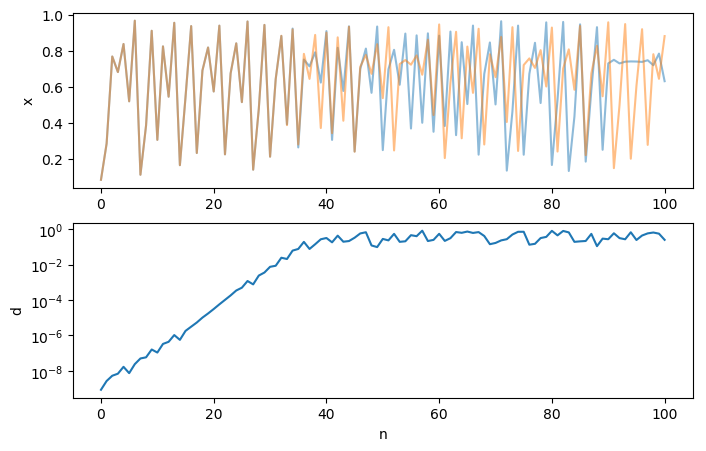

In [16]:
using LinearAlgebra: norm

figure(figsize=(8,5))

# Plot the x-coordinate of the two trajectories:
ax1 = subplot(2,1,1)
plot(tr1[:, 1], alpha = 0.5)
plot(tr2[:, 1], alpha = 0.5)
ylabel("x")

# Plot their distance in a semilog plot:
ax2 = subplot(2,1,2, sharex = ax1)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
ylabel("d")
xlabel("n")
semilogy(d);

The slope of this line is the Lyapunov exponent!

The maximum Lyapunov exponent is the average of the time-local exponents:

<img src="https://render.githubusercontent.com/render/math?math=%5Clambda%20%3D%20%5Cfrac%7B1%7D%7Bt_%7Bn%7D%7D%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%0A%5Cln%5Cleft%28%20a_i%20%5Cright%29%2C%5Cquad%20a_i%20%3D%20%5Cfrac%7Bd%28t_%7Bi%7D%29%7D%7Bd_0%7D.&mode=display">

In [17]:
shi = Systems.shinriki(;R1=21.0)

3-dimensional continuous dynamical system
 state:       [-2.0, 0.0, 0.2]
 e.o.m.:      shinriki_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [21.0]

In [18]:
lyapunov(shi, 1000.0, Ttr=10.0)

0.26094876765832853

In [19]:
# increase accuracy! (somehow the transient time corresponds to this)
lyapunov(shi, 2000.0, Ttr=1000.0)

5.481132272928213e-5

Make a hella-good orbit diagram around the "critical" value of R=21

In [20]:
pvalues = range(20.95,stop=21.05,length=101)
i = 1
plane = (2, 0.0)
tf = 1000.0
p_index = 1

# use extremely long transient time:
@time output = produce_orbitdiagram(shi, plane, i, 1, pvalues; tfinal = tf,
                              Ttr = 2000.0, direction = -1, printparams = false);
length(output)

 41.636893 seconds (24.94 M allocations: 1.206 GiB, 1.90% gc time)


101

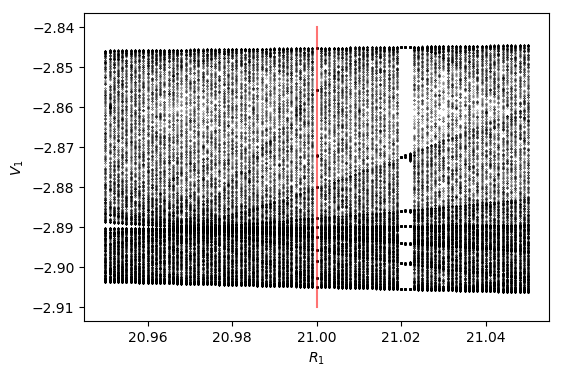

In [21]:
figure(figsize=(6,4))
for (j, p) in enumerate(pvalues)
    plot(p .* fill(1, length(output[j])), output[j], lw = 0,
    marker = "o", ms = 0.2, color = "black")
end
plot([21, 21], [-2.91, -2.84], color = "red", alpha = 0.55)
xlabel("\$R_1\$"); ylabel("\$V_1\$");

In [23]:
# result of orbit diagram at R1 = 21.0
values_ = output[51] 

# Amount of unique points
un = unique(round.(output[51], digits = 8))
println("Total: $(length(output[51])), unique: $(length(un))")

Total: 759, unique: 25


I'm rather lost